# Logistic Regression

### Linear regression can be used to predict things like how much money a customer will spend due to a certain promotion, or how happy employees are in reaction to different management styles. But oftentimes, we are actually interested in predicting the probability of an outcome – whether a customer will buy a product or not, or whether an employee will leave the company or stay. For situations like those, where the outcome is categorical rather than continuous, we can use logistic regression. Yes, this means we are using regression as a classifier!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

## Logistic regression vs linear regression

### The formula for binary logistic regression relating 𝑝 (the probability of getting  𝑦=1 rather than 𝑦=0 in outcome variable 𝑦) to a matrix of variables 𝑋 is: 𝑙𝑛(𝑝/(1−𝑝))=𝛽𝑋
### If 𝑝is the probability of 𝑦=1, and there are only two possible values for 𝑦 (0 and 1), then 1−𝑝 is the probability of. The ratio of 𝑝 to 1−𝑝 gives the odds of getting 𝑦=1. For example, if an unfair coin has an 80% probability of turning up heads, then the odds of getting heads on any given flip are .8/(1−.8)=4. In other words, for any given coin flip, you are four times more likely to get heads than tails. Conversely, of course, the odds of getting tails are .2/(1−.2)=.25. The convention is to calculate the odds of the more likely outcome over the less likely outcome, as odds less than 1 (like .25) are not very intuitive.

### After the transformation, logistic regression and linear regression behave in the same way and follow the same assumptions: linearity (of the transformed probabilities and the predictors), multivariate normality of the residuals_, _homoscedasticity (variance of the residuals is constant across all predicted values), and low multicollinearity.

## Why log?

### You will also see 𝑙𝑛(𝑝/(1−𝑝)) summarized as 𝑙𝑜𝑔𝑖𝑡(𝑝). In either case, it represents the natural log of the odds of getting 𝑦=1. We convert our binary outcome 𝑦(0,1) into logged odds because regression requires normally distributed residuals, which come from a linear relationship between outcome and predictor. You can't get those from binary outcomes or odds on their own, as we will demonstrate.

### First, let's create a continuous variable x and a binary variable y and graph them:

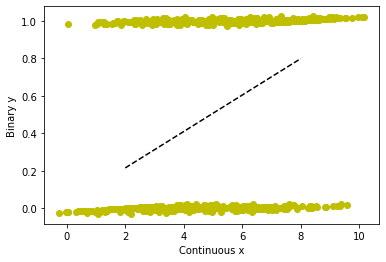

In [2]:
# Set the random seed so that the 'random' data is the same each time
# the code is run.
np.random.seed(seed=456613)

# Create some data.
df = pd.DataFrame()
for probs in list(range(2, 9)):
    tmp = pd.DataFrame({
        'y': np.random.binomial(1, probs / 10, size=(1, 100))[0],
        'x': probs
    }) 
    df = df.append(tmp)

    
# Continuous predictor.
x = df['x']

# Binary outcome.
bin_y = df['y']

# Calculate linear regression for x and bin_y.
fit = np.polyfit(x,bin_y,1)

# Work as a function to return the predicted value of y.
fit_fn = np.poly1d(fit)

# Add a little 'noise' to the data for graphing purposes.
jitter = np.random.randn(700)

# Display our results.
plt.plot(x + jitter, bin_y + jitter / 100, 'yo', x, fit_fn(x), '--k')
plt.xlabel('Continuous x')
plt.ylabel('Binary y')
plt.show()

### We could fit a linear regression line to this data, but you can see that it would be a very poor fit. A well-fitting regression line will reflect the shape of the data, and this line cannot do that because the binary y only takes two possible values. The relationship between x and y is very, very non-linear. If we tried to do regression anyway, it would lead to a very badly fitting model.

### Let's try another strategy and convert those binary values into the odds of getting 𝑦=1 for each value of 𝑥 

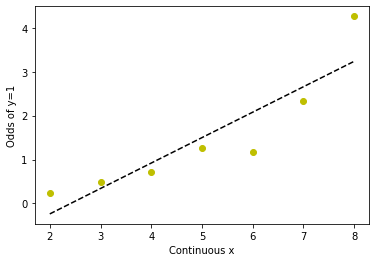

In [3]:
# Unique values in x.
xvals = x.unique()

# Calculate and store the odds.
yodds = []
for xi in xvals: 
    y1_ct = bin_y[x == xi].sum()  # The number of trials y = 1.
    y0_ct = len(bin_y[x == xi]) - y1_ct  # The number of trials y = 0.
    yodds.append(y1_ct / y0_ct)  # Odds of getting y = 1 for xi.
    
# Calculate linear regression for x and yodds.
fit = np.polyfit(xvals, yodds, 1)

# Work as a function to return the predicted value of yodds.
fit_fn = np.poly1d(fit)

# Display our work.
plt.plot(xvals, yodds, 'yo', xvals, fit_fn(xvals), '--k')
plt.xlabel('Continuous x')
plt.ylabel('Odds of y=1')
plt.show()

### This looks better than our first plot.  To get the odds, we counted up how many times 𝑦=1 for each value of 𝑥 and divided it by the number of times 𝑦=0. This gives us the odds of getting 𝑦=1 for each value of 𝑥. The odds are a continuous variable, rather than a binary one. However, as we can see, the relationship between the odds and the continuous 𝑥 is still not linear – there is variation in the odds that isn't being captured by 𝑥.

### To capture that nonlinearity, we can try a non-linear transformation of the odds variable.

### Linear vs non-linear transformations

### A linear transformation is one where the relationship between the original value and the transformed value is the same for all values in a variable. Addition, subtraction, multiplication, and division are examples of linear transformations:

### Not every transformation is linear. Let's look at squaring and logarithms for example.

### For the square transformation, the larger the input, the bigger the impact of increasing or decreasing the input by 1. For the logrithm transformation, the larger the input, the smaller the impact of increasing or decreasing the input by 1 (except for log(1), which is a special case).

## Logarithms to the rescue

### Formally, a logarithm is the power to which the base must be raised to produce the number being logged. For log base 2, the log of 1 is 0, because 20=1. Similarly, the log of 2 is 1, because 21=2. The log of 3 is 1.58 (and some more digits) because 21.58...=3.

### Logarithms are useful when dealing with data where values become more and more widely spaced as they become larger. If you look back to the graph we just made, you'll see that the difference between the odds for 𝑥=7 and  𝑥=8 is at least 10 times larger than the difference between 𝑥=1 and 𝑥=2. 

### Logging the odds "shrinks" the values toward zero, with a greater shrinkage factor for larger values. For us, that means logging the odds has the possibility of evening up the distances between the odds values, leading to a linear relationship with x.

### Now let's try taking the log of the odds:

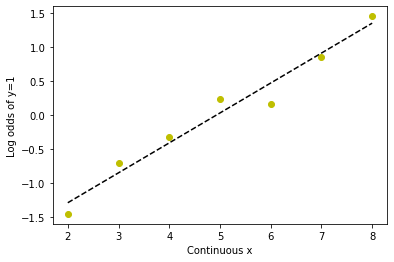

In [4]:
# Natural log of the odds.
ln_yodds = np.log(yodds)

# Calculate linear regression for x and yodds.
fit = np.polyfit(xvals, ln_yodds, 1)

# Works as a function to return the predicted value of yodds.
fit_fn = np.poly1d(fit)

# Display.
plt.plot(xvals, ln_yodds, 'yo', xvals, fit_fn(xvals), '--k')
plt.xlabel('Continuous x')
plt.ylabel('Log odds of y=1')

plt.show()

### Now that looks more like a linear relationship, with distances of similar magnitude between the points. Regression can work with this. The drawback, of course, is that working with logged odds leads to conclusions like "A 1-year increase in age leads to a 2.2 log-odds increase in the likelihood of having a hearing problem," which is basically gibberish to most people. As a result, when interpreting individual coefficients from a binary logistic regression, it is customary to back-transform the log-odds into odds by exponentiating (𝑒𝑙𝑜𝑔𝑖𝑡(𝑝)), and then interpret the odds.

### Note that it is the convention to use the natural log when logging the odds, and therefore the exponentiation uses Euler's number 𝑒 as the base.

## Fitting a binary logistic model using statsmodels

   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4


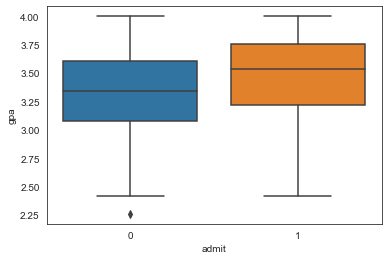

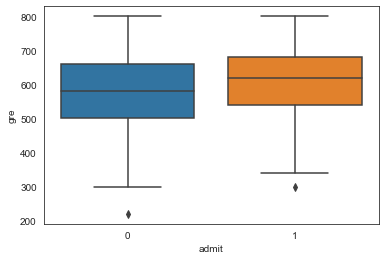

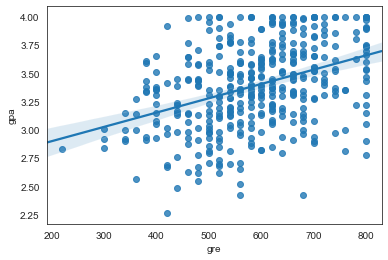

In [5]:
# Read in the data.
df = pd.read_csv("https://www.dropbox.com/s/qhf0ocdqb3gh7ni/logistic_regression.csv?dl=1") 

# Take a peek.
print(df.head())

# Prettier plots are better.
sns.set_style("white")

# Bivariate relationships of predictors to admissions outcome.
sns.boxplot(x="admit", y="gpa", data=df)
plt.show()
sns.boxplot(x="admit", y="gre", data=df)
plt.show()

# Relationship between predictors.
sns.regplot(x='gre', y='gpa', data=df)
plt.show()

### Looks like our predictors may add some value, but they are also correlated with each other, which could cause some problems. Let's go ahead:

In [6]:
# Declare predictors.
X_statsmod = df[['gre', 'gpa']]

# The Statsmodels formulation requires a column with constant value 1 that
# will act as the intercept.
X_statsmod['intercept'] = 1 

# Declare and fit the model.
logit = sm.Logit(df['admit'], X_statsmod)
result = logit.fit()

# Lots of information about the model and its coefficients, but the
# accuracy rate for predictions is missing.
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.600430
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                            2
Date:                Sun, 29 Sep 2019   Pseudo R-squ.:                 0.03927
Time:                        17:33:43   Log-Likelihood:                -240.17
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 5.456e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0027      0.001      2.544      0.011       0.001       0.005
gpa            0.7547      0.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
# Calculate accuracy. First, get probability that each row will be admitted.
pred_statsmod = result.predict(X_statsmod)

# Code admission as 1 if probability is greater than .5.
pred_y_statsmod = np.where(pred_statsmod < .5, 0, 1)

# Accuracy table.
table = pd.crosstab(df['admit'], pred_y_statsmod)

print('\n Accuracy by admission status')
print(table)
print('\n Percentage accuracy')
print((table.iloc[0,0] + table.iloc[1,1]) / (table.sum().sum()))


 Accuracy by admission status
col_0    0   1
admit         
0      263  10
1      118   9

 Percentage accuracy
0.68


## Fitting a binary logistic model using SKLearn

### The SKlearn logistic regression functionality includes a parameter regularization element that penalizes extremely large parameters in the name of increasing predictive accuracy.

In [8]:
# Declare a logistic regression classifier.
# Parameter regularization coefficient C described above.
lr = LogisticRegression(C=1e9)
y = df['admit']
X = df[['gpa', 'gre']]

# Fit the model.
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lr.score(X, y))

Coefficients
[[0.74747563 0.00267019]]
[-4.91157158]

 Accuracy by admission status
admit    0    1
row_0          
0      263  118
1       10    9

 Percentage accuracy
0.68


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Ridge Regression

### The core principle behind ridge regression is that, as models become increasingly complex and features correlate with one another more and more (become _multicolinear_), coefficients arrived at by OLS become increasingly large. This is a sign that the model is incorporating too much variance from the dataset – in other words, overfitting. Ridge regression is a model variance minimizer and works to keep that from happening.

In [9]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [10]:
# Load air quality data, drop the index column and any missing data columns.
df = pd.read_csv(
    'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/credit-card-defaults.csv'
).iloc[:, 1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default'] == 'Yes', 1, 0)
df['student'] = np.where(df['student'] == 'Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

# Set up the regression model to predict defaults using all other
# variables as features.
regr1 = linear_model.LinearRegression()
Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]
regr1.fit(X_train, Y_train)
print('\nR-squared simple model:')
print(regr1.score(X_train, Y_train))

#Store the parameter estimates.
origparams = np.append(regr1.coef_, regr1.intercept_)

# Make new features to capture potential quadratic and cubic relationships
# between the features.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

# Re-run the model with the new features.
regrBig = linear_model.LinearRegression()
X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]
regrBig.fit(X_train2, Y_train)
print('\nR-squared complex model:')
print(regrBig.score(X_train2, Y_train))

# Store the new parameter estimates for the same features.
newparams = np.append(
    regrBig.coef_[0,0:(len(origparams)-1)],
    regrBig.intercept_)

print('\nParameter Estimates for the same predictors for the small model '
      'and large model:')
compare = np.column_stack((origparams, newparams))
prettycompare = np.array2string(
    compare,
    formatter={'float_kind':'{0:.3f}'.format})
print(prettycompare)


R-squared simple model:
0.573878496271703

R-squared complex model:
0.5739734452073215

Parameter Estimates for the same predictors for the small model and large model:
[[0.014 -0.004]
 [-0.759 -0.759]
 [0.000 4157.868]
 [-0.001 553434.766]]


### Look at that intercept (last line)! The R-squared value barely increased, but even so the inflation of the parameters suggests that the gain is due to overfitting. Let's apply the model to the test set and find out:

In [11]:
# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]
print('\nR-squared simple model:')
print(regr1.score(X_test, Y_test))

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3

# Re-run the model with the new features.
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]
print('\nR-squared complex model:')
print(regrBig.score(X_test2, Y_test))


R-squared simple model:
0.5630697922503317

R-squared complex model:
0.5630239527360242


### The complex model fits worse.  How would this change if we apply ridge regression?

In [12]:
# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced. Note that by convention, the
# intercept is not regularized. Since we standardized the data
# earlier, the intercept should be equal to zero and can be dropped.

ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 
ridgeregr.fit(X_train, Y_train)
print(ridgeregr.score(X_train, Y_train))
origparams = ridgeregr.coef_[0]
print(origparams)

ridgeregrBig = linear_model.Ridge(alpha=10, fit_intercept=False)
ridgeregrBig.fit(X_train2, Y_train)
print(ridgeregrBig.score(X_train2, Y_train))
newparams = ridgeregrBig.coef_[0, 0:len(origparams)]

print('\nParameter Estimates for the same predictors for the small model'
      'and large model:')
compare = np.column_stack((origparams, newparams))
prettycompare = np.array2string(
    compare,
    formatter={'float_kind':'{0:.3f}'.format})
print(prettycompare)

0.5738739164402877
[ 1.36988466e-02 -7.57859433e-01 -3.25298557e-04]
0.5739464289613578

Parameter Estimates for the same predictors for the small modeland large model:
[[0.014 -0.002]
 [-0.758 -0.757]
 [-0.000 0.048]]


### The difference in magnitude for parameters in the training set is much smaller – no parameter explosion here. Let's check the implications for the fit of the models on the test set.

In [13]:
print(ridgeregr.score(X_test, Y_test))
print(ridgeregrBig.score(X_test2, Y_test))

0.5631088763076704
0.5631804323930323


### And now, the model that worked a little better on the training set also works a little better on the test set. Again, these differences are small and don't matter much here, but in real life much larger differences can happen. Ridge regression is an excellent tool to reach for whenever you have many correlated parameters, or when you start to see parameter estimates inflate as the R-square estimate goes up, suggesting overfitting.

## Regularization parameter: Ridge

### Earlier, we set the regularization parameter 𝜆=10. In ridge regression, the regularization parameter 𝜆 can take any value greater than 0. The best way to choose an optimal regularization parameter is through cross-validation, checking which parameter gives the most consistent results across training and test sets. Here is an illustration of how the parameter values in the income model vary as alpha goes up.

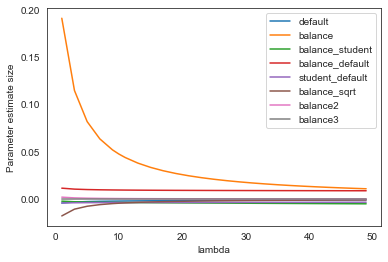

In [14]:
# Store estimates.
estimates = np.append(ridgeregrBig.coef_, [10])

# Storing legend information.
labels = []

#Run the model for many alphas.
for lambd in range(1, 50, 2):
    ridgeregrBig = linear_model.Ridge(alpha=lambd, fit_intercept=False)
    ridgeregrBig.fit(X_train2, Y_train)
    estimates = np.row_stack((
        estimates,
        np.append(ridgeregrBig.coef_,[lambd])))

# Make the data pretty.
estimates_df = pd.DataFrame(
    estimates,
    columns=list(X_train2.columns) + ['lambda'])
estimates_df.sort_values(by='lambda', inplace=True, ascending=True)

# Leave out the 'student' variable.
# It has very high values and throws off our plot's scale.
varstoplot = list(estimates_df.columns[:9,])
varstoplot.remove('student')

# Plot a line for each parameter.
for var in varstoplot:
    plt.plot(estimates_df['lambda'], estimates_df[var])
    labels.append(var)
plt.xlabel('lambda')
plt.ylabel('Parameter estimate size')
plt.legend(labels)
plt.show()

# Lasso Regression

## Least Absolute Shrinkage and Selection Operator (Lasso)

### This is a  model optimization mechanic that works by trying to force small parameter estimates to be equal to zero, effectively dropping them from the model.  A benefit being that it prevents overfitting and work as an embedded feature selection model.

In [15]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

### Lasso is extremely handy when you are dealing with thousands or hundreds of thousands of predictors and need to optimize processor time, or when you want to arrive at a simpler solution that is easier to interpret.

### Lasso penalizes by the sum of the absolute values of the coefficients. This means the penalty doesn't increase as swiftly with coefficient size. Regularization based on the sum of the absolute weights is also called "L1 regularization".

### While we can calculate a derivative for most of the values of 𝑥 in lasso, there is no derivative where  𝑥=0.  You can imagine this as our multi-dimensional surface made up of gradients having a big hole in it (the technical term for the hole is a "discontinuity"). If the gradient descent algorithm calculates a value that falls in the "hole", it has no idea where to go next. The model "fails to converge". In other words, it fails to arrive at an optimal solution.

## Fitting Lasso: Coordinate Descent Algorithm

### Since basing modeling strategy on a surface with a hole in it is obviously not ideal, lasso regression models are optimized using a coordinate descent algorithm rather than a gradient descent algorithm. Coordinate descent works like this:

### Pick some starting values for 𝛽, often  𝛽=0
### For each feature 𝑗 in  𝛽:
### Predict the outcome using all features except for 𝑗

### Look at how the residuals from the model using 𝛽−𝑗 (all betas except 𝑗) correlate with feature 𝑗. This correlation is called 𝜌𝑗.

### If the correlation falls within an area enclosing 0 defined by 𝜆, set 𝛽𝑗=0. (called soft threshholding)
* If 𝜌𝑗<𝜆2 set 𝛽𝑗 equal to 𝜌𝑗+𝜆2
* If 𝜌𝑗>𝜆2 set 𝛽𝑗 equal to 𝜌𝑗−𝜆2

### This will iterate through all features 1 through 𝑗 on each cycle, then begin again. Alternatively, the algorithm can be set to choose to exclude a feature at random each iteration, rather than cycling through all features. Each time a feature is checked, it will shrink a bit from the previous time (unless the feature is already set to 0, in which case it will remain 0).

### Continue until the maximum difference between parameter estimates in the previous cycle and the current cycle is less than a pre-determined threshold 𝑡𝑜𝑙. For SKlearn, 𝑡𝑜𝑙 defaults to 0.0001.

### To summarize: Lasso works by iteratively fitting a model to the data while excluding one of the features. It then checks how well the model reproduces the data, and if the model fit is good enough (with "good enough" determined by 𝜆) then the excluded feature is deemed unnecessary and its 𝛽 is set to zero, effectively excluding it from the model. Otherwise, the excluded feature's 𝛽 is set using a combination of the correlation of the feature with the model residuals (𝜌𝑗) and 𝜆2 and a new iteration begins, using the newly-computed 𝛽 for the previously-excluded feature and excluding a new feature. This continues until the change in 𝛽 is less than a pre-determined threshold.

### Let's see how lasso can both create overfitting-protection through shrinkage and create sparsity (many parameters set to 0) through feature selection.  The same dataset will be used to show this in action:

In [16]:
# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv(
    'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/credit-card-defaults.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]

In [17]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

R² for the model with few features:
0.4500625793011847

Parameter estimates for the model with few features:
[-0.         -0.40657726 -0.          0.00114596]

R² for the model with many features:
0.44363376712897096

Parameter estimates for the model with many features:
[ 0.00000000e+00 -3.89351238e-01  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -2.77688887e-04
 -7.09158792e-07  3.48711577e+00]


### We can check the predictive power using the test set:

In [18]:
print(lass.score(X_test, Y_test))

print(lassBig.score(X_test2, Y_test))

0.44553225151184195
0.4380466345914476


## Regularization parameter: Lasso

### The 𝜆 for lasso can var between 0 (no penalty, acts like OLS) and infinity. If 𝜆 is too large, all parameters will be set to zero.

### Create a plot below of how 𝑅2 varies across different values of 𝜆 for ridge and lasso regression. Use logic and code similar to the ridge regression demonstration above, and base your plot on the X_train2 feature set.

### Do lasso and ridge yield the same 𝑅2 for a given lambda value?

In [19]:
# Take the code you worked through at the beginning of this section
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

R² for the model with few features:
0.4500625793011847

Parameter estimates for the model with few features:
[-0.         -0.40657726 -0.          0.00114596]

R² for the model with many features:
0.44363376712897096

Parameter estimates for the model with many features:
[ 0.00000000e+00 -3.89351238e-01  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -2.77688887e-04
 -7.09158792e-07  3.48711577e+00]


In [20]:
# Check the predictive power

print(lass.score(X_test, Y_test))

print(lassBig.score(X_test2, Y_test))

0.44553225151184195
0.4380466345914476


### Lasso Regression

In [21]:
alphas = []
r_sq = []
for a in np.linspace(0.01, 0.99, 50):
    lassBig = linear_model.Lasso(alpha = a)
    lassBig.fit(X_train2, Y_train)
    alphas.append(a)
    r_sq.append(lassBig.score(X_test2, Y_test))

### Ridge Regression

In [22]:
alphas2 = []
r_sq2 = []
for a in np.linspace(0.01, 0.99, 50):
    ridgeBig = linear_model.Ridge(alpha = a, fit_intercept=False)
    ridgeBig.fit(X_train2, Y_train)
    alphas2.append(a)
    r_sq2.append(ridgeBig.score(X_test2, Y_test))

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.82255e-18): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.47143e-18): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.12542e-18): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.27844e-17): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.64482e-17): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAl

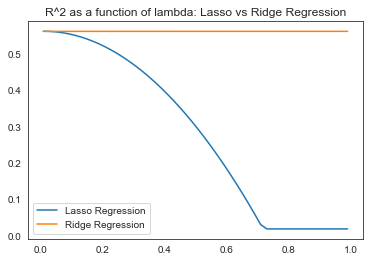

In [23]:
plt.plot(alphas, r_sq, label = 'Lasso Regression')
plt.plot(alphas2, r_sq2, label = 'Ridge Regression')
plt.title('R^2 as a function of lambda: Lasso vs Ridge Regression')
plt.legend()
plt.show()

### From the plot above, we see that the lasso and the ridge do not yield the same r^2 results.  If alphas = 0, then it is Ridge.  For Lasso, alphas can vary from 0 to infinity.